In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from math import radians, cos, sin, sqrt, asin
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [225]:
df=pd.read_csv("TaxiFare.csv")

In [226]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [228]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [229]:
df.shape

(50000, 8)

In [230]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [231]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [232]:
df.drop(["unique_id"],axis=1,inplace=True)

In [233]:
df.shape

(50000, 7)

In [234]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [235]:
#Add a new variable travel distance
df['travel_dist_km'] = distance_transform(df['longitude_of_pickup'].to_numpy(),df['latitude_of_pickup'].to_numpy(),df['longitude_of_dropoff'].to_numpy(),df['latitude_of_dropoff'].to_numpy())

In [236]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])
df['Day'] = df['date_time_of_pickup'].dt.day
df['Day_of_week'] = df['date_time_of_pickup'].dt.day_name()
df['Month'] = df['date_time_of_pickup'].dt.month
df['Month_Name'] = df['date_time_of_pickup'].dt.month_name()
df['Year'] = df['date_time_of_pickup'].dt.year
df['Time'] = df['date_time_of_pickup'].dt.time
df['Hour'] = df['date_time_of_pickup'].dt.hour

In [237]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,travel_dist_km,Day,Day_of_week,Month,Month_Name,Year,Time,Hour
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,15,Monday,6,June,2009,17:26:21,17
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,5,Tuesday,1,January,2010,16:52:16,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,18,Thursday,8,August,2011,00:35:00,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,21,Saturday,4,April,2012,04:30:42,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,9,Tuesday,3,March,2010,07:51:00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,4.940374,12,Wednesday,6,June,2013,23:25:15,23
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.874706,22,Monday,6,June,2015,17:19:18,17
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2.263286,30,Sunday,1,January,2011,04:53:00,4
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,0.665245,6,Tuesday,11,November,2012,07:09:00,7


In [238]:
df["Day_of_week"].unique()

array(['Monday', 'Tuesday', 'Thursday', 'Saturday', 'Wednesday', 'Sunday',
       'Friday'], dtype=object)

In [239]:
df.shape

(50000, 15)

In [240]:
df["DayOfWeek_1"] = df["Day_of_week"]

In [241]:
df['DayOfWeek_1'] = df['DayOfWeek_1'].replace({'Sunday': 'Weekend', 'Saturday': 'Weekend'})
df['DayOfWeek_1'] = df['DayOfWeek_1'].replace({day: 'Weekday' for day in df['Day_of_week'].unique() if day != 'Weekend'})

In [242]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,travel_dist_km,Day,Day_of_week,Month,Month_Name,Year,Time,Hour,DayOfWeek_1
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,15,Monday,6,June,2009,17:26:21,17,Weekday
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,5,Tuesday,1,January,2010,16:52:16,16,Weekday
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,18,Thursday,8,August,2011,00:35:00,0,Weekday
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,21,Saturday,4,April,2012,04:30:42,4,Weekend
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,9,Tuesday,3,March,2010,07:51:00,7,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,4.940374,12,Wednesday,6,June,2013,23:25:15,23,Weekday
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.874706,22,Monday,6,June,2015,17:19:18,17,Weekday
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2.263286,30,Sunday,1,January,2011,04:53:00,4,Weekend
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,0.665245,6,Tuesday,11,November,2012,07:09:00,7,Weekday


In [243]:
df["Month_wise"]=df["Day"]

In [244]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,travel_dist_km,Day,Day_of_week,Month,Month_Name,Year,Time,Hour,DayOfWeek_1,Month_wise
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,15,Monday,6,June,2009,17:26:21,17,Weekday,15
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,5,Tuesday,1,January,2010,16:52:16,16,Weekday,5
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,18,Thursday,8,August,2011,00:35:00,0,Weekday,18
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,21,Saturday,4,April,2012,04:30:42,4,Weekend,21
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,9,Tuesday,3,March,2010,07:51:00,7,Weekday,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,4.940374,12,Wednesday,6,June,2013,23:25:15,23,Weekday,12
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.874706,22,Monday,6,June,2015,17:19:18,17,Weekday,22
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2.263286,30,Sunday,1,January,2011,04:53:00,4,Weekend,30
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,0.665245,6,Tuesday,11,November,2012,07:09:00,7,Weekday,6


In [245]:
df['Month_wise'] = df['Month_wise'].replace(range(1, 10 + 1), "First_Half")
df['Month_wise'] = df['Month_wise'].replace(range(11, 20 + 1), "Mid_Half")
df['Month_wise'] = df['Month_wise'].replace(range(21, 30 + 1), "Last_Half")

In [246]:
df['Hour'] = df['date_time_of_pickup'].dt.hour
# Define time categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
# Apply categorize_time function to create a new column
df['Time_Category'] = df['Hour'].apply(categorize_time)
# Display the updated dataframe
print(df[['date_time_of_pickup', 'Hour', 'Time_Category']])

            date_time_of_pickup  Hour Time_Category
0     2009-06-15 17:26:21+00:00    17       Evening
1     2010-01-05 16:52:16+00:00    16     Afternoon
2     2011-08-18 00:35:00+00:00     0         Night
3     2012-04-21 04:30:42+00:00     4         Night
4     2010-03-09 07:51:00+00:00     7       Morning
...                         ...   ...           ...
49995 2013-06-12 23:25:15+00:00    23         Night
49996 2015-06-22 17:19:18+00:00    17       Evening
49997 2011-01-30 04:53:00+00:00     4         Night
49998 2012-11-06 07:09:00+00:00     7       Morning
49999 2010-01-13 08:13:14+00:00     8       Morning

[50000 rows x 3 columns]


In [247]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,travel_dist_km,Day,Day_of_week,Month,Month_Name,Year,Time,Hour,DayOfWeek_1,Month_wise,Time_Category
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,15,Monday,6,June,2009,17:26:21,17,Weekday,Mid_Half,Evening
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,5,Tuesday,1,January,2010,16:52:16,16,Weekday,First_Half,Afternoon
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,18,Thursday,8,August,2011,00:35:00,0,Weekday,Mid_Half,Night
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,21,Saturday,4,April,2012,04:30:42,4,Weekend,Last_Half,Night
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,9,Tuesday,3,March,2010,07:51:00,7,Weekday,First_Half,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,4.940374,12,Wednesday,6,June,2013,23:25:15,23,Weekday,Mid_Half,Night
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.874706,22,Monday,6,June,2015,17:19:18,17,Weekday,Last_Half,Evening
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2.263286,30,Sunday,1,January,2011,04:53:00,4,Weekend,Last_Half,Night
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,0.665245,6,Tuesday,11,November,2012,07:09:00,7,Weekday,First_Half,Morning


In [248]:
df=df.drop(df[(df.amount==0) & (df.travel_dist_km==0)].index)
df=df.drop(df[df.no_of_passenger==0].index)
df=df.drop(df[(df.amount<=2)].index)

<Axes: title={'center': 'Taxi trips count During Month'}, xlabel='Hour', ylabel='count'>

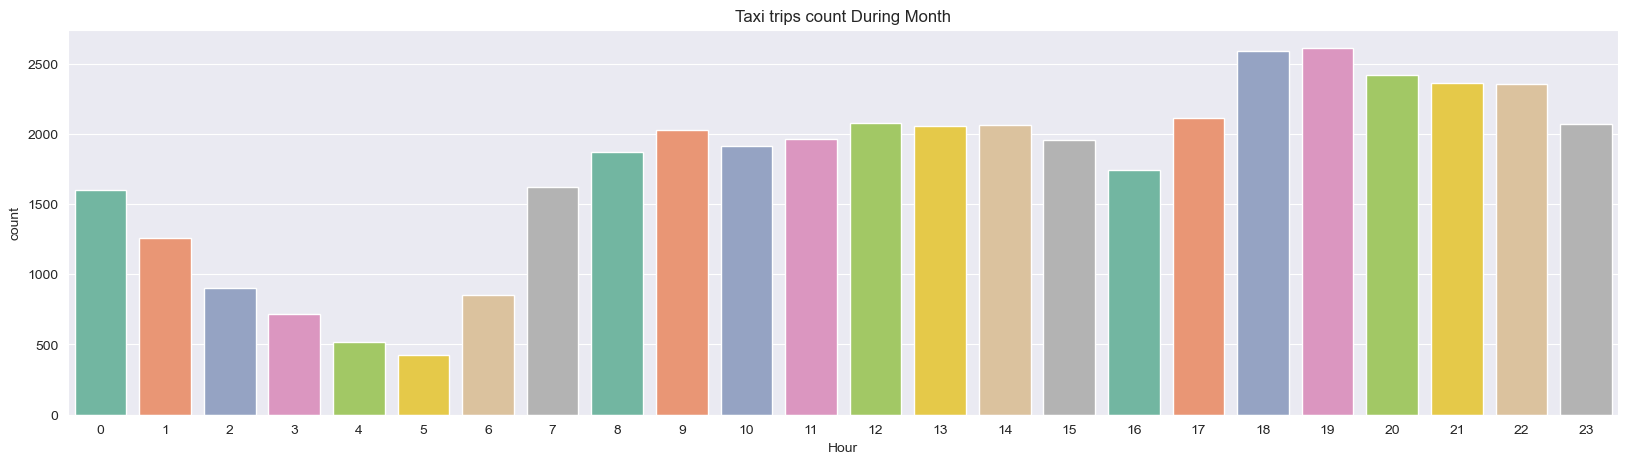

In [249]:
plt.figure(figsize=(20,5))
plt.title('Taxi trips count During Month')
sns.set_style("white")
sns.countplot(x='Hour', data=df.loc[(df.Month>= 1) & (df.Month<=10)], palette='Set2')

In [250]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,travel_dist_km,Day,Day_of_week,Month,Month_Name,Year,Time,Hour,DayOfWeek_1,Month_wise,Time_Category
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,15,Monday,6,June,2009,17:26:21,17,Weekday,Mid_Half,Evening
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,5,Tuesday,1,January,2010,16:52:16,16,Weekday,First_Half,Afternoon
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,18,Thursday,8,August,2011,00:35:00,0,Weekday,Mid_Half,Night
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,21,Saturday,4,April,2012,04:30:42,4,Weekend,Last_Half,Night
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,9,Tuesday,3,March,2010,07:51:00,7,Weekday,First_Half,Morning


<Axes: title={'center': 'Taxi trips count during week days'}, xlabel='Hour', ylabel='count'>

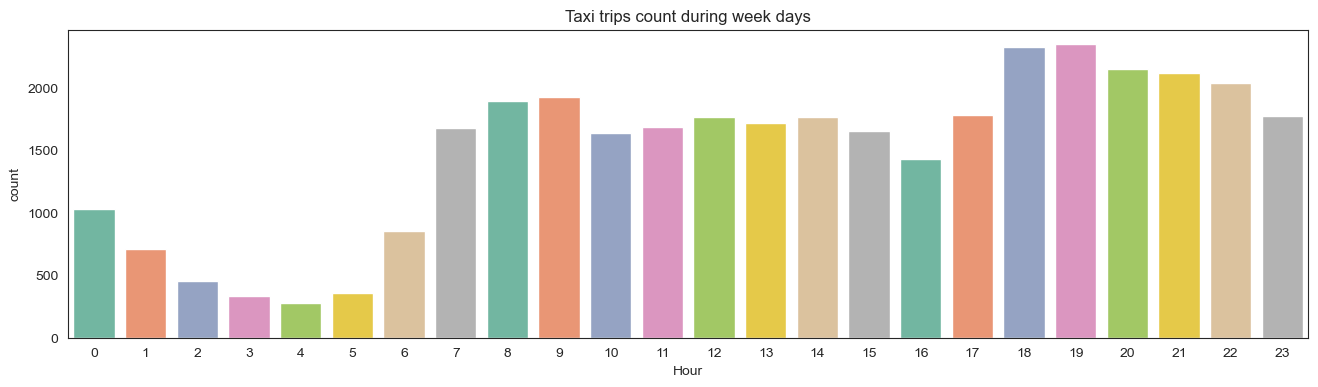

In [251]:
plt.figure(figsize=(16,4))
plt.title('Taxi trips count during week days')
sns.set_style("white")
sns.countplot(x='Hour', data=df.loc[(df.DayOfWeek_1 =="Weekday")], palette='Set2')

<Axes: title={'center': 'Taxi trips count during week End'}, xlabel='Hour', ylabel='count'>

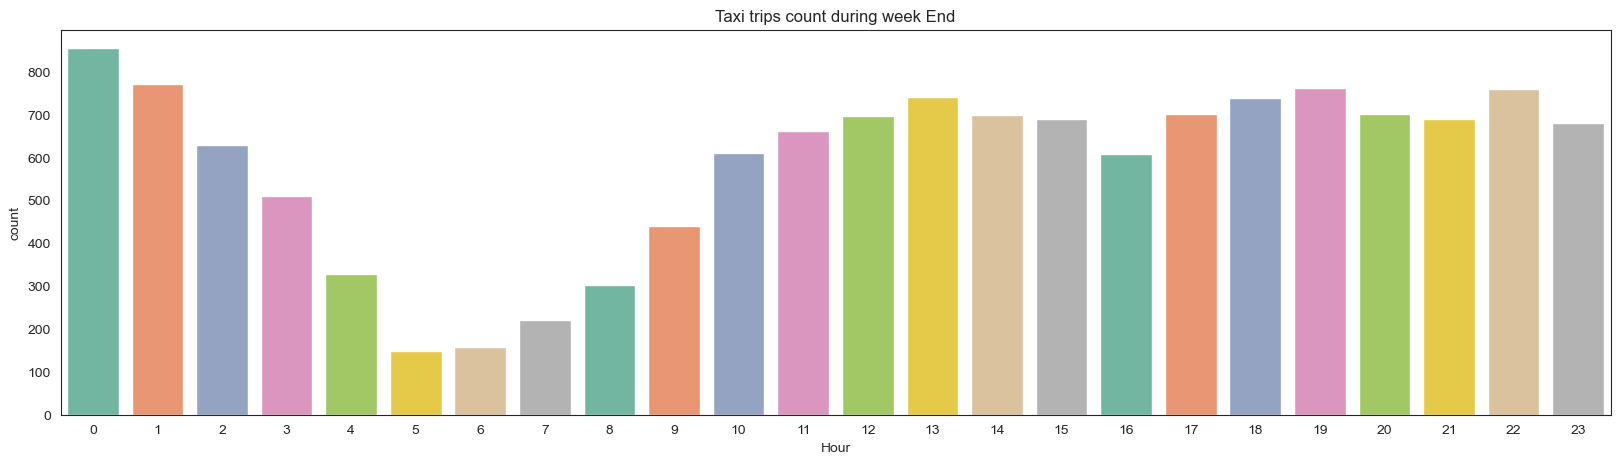

In [252]:
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during week End')
sns.set_style("white")
sns.countplot(x='Hour', data=df.loc[(df.DayOfWeek_1 =="Weekend")], palette='Set2')

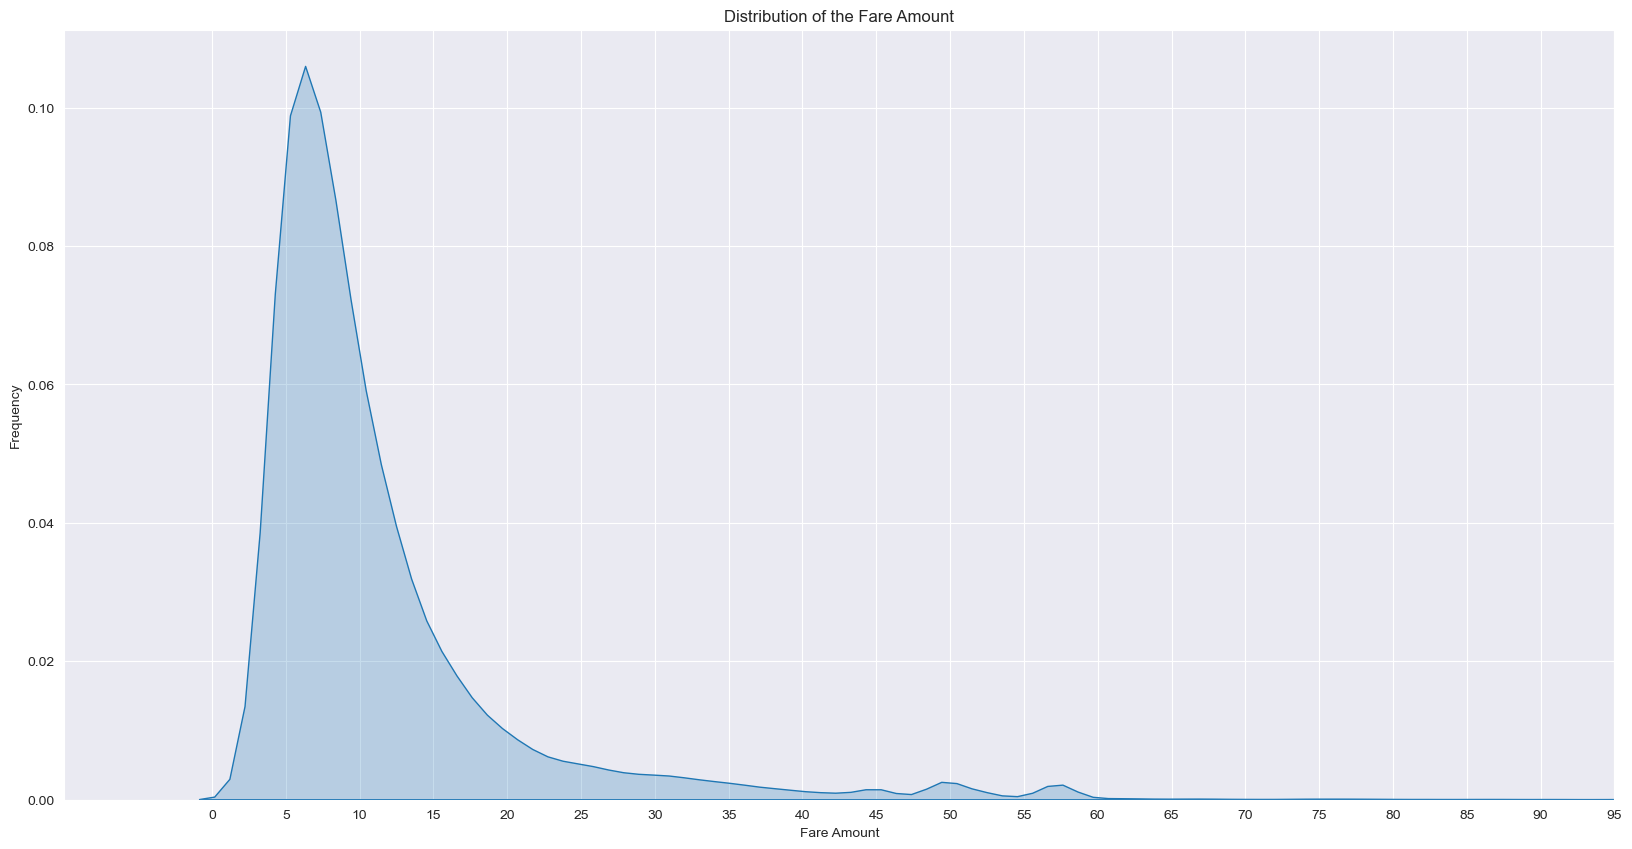

In [253]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Distribution of the Fare Amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.xlim(-10,20)
plt.xticks(range(0,100,5))
snsplot = sns.kdeplot(df.amount, shade=True)

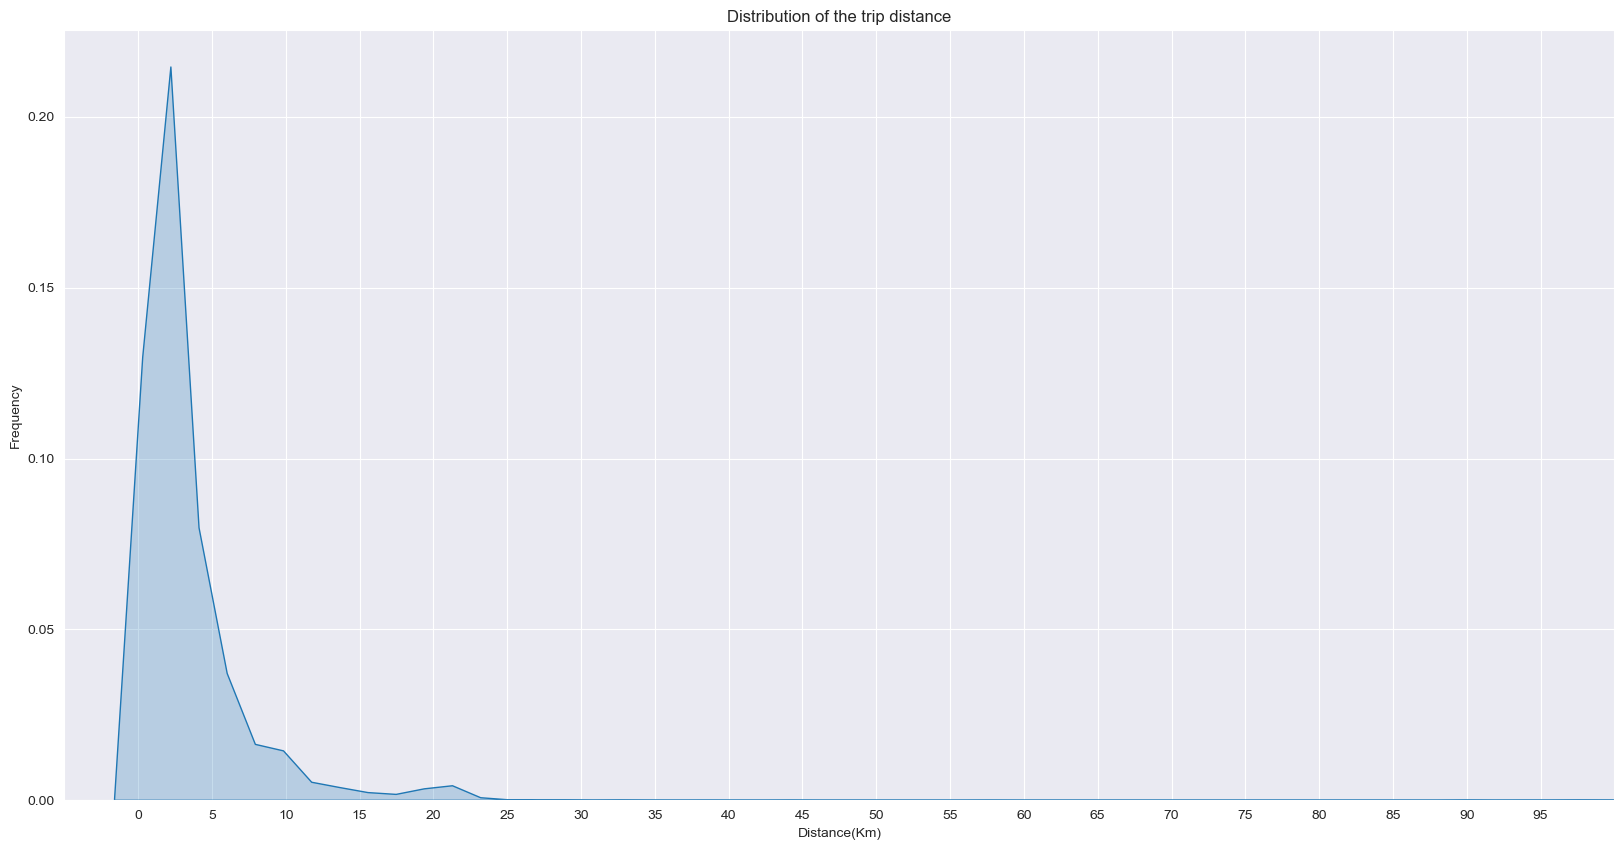

In [254]:
plt.figure(figsize = (20,10))
sns.style = ('darkgrid')
plt.title("Distribution of the trip distance")
plt.xlabel("Distance(Km)")
plt.ylabel("Frequency")
plt.xlim(-5, 100)
plt.xticks(range(0,100,5))
sns.plot = sns.kdeplot(df[df.travel_dist_km<1000].travel_dist_km, shade=True)

In [255]:
week_days = df[df["DayOfWeek_1"]=="Weekday"]
week_ends = df[df["DayOfWeek_1"]=="Weekend"]
week_days_fare = week_days.groupby(['Hour']).amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['Hour']).amount.mean().to_frame().reset_index()

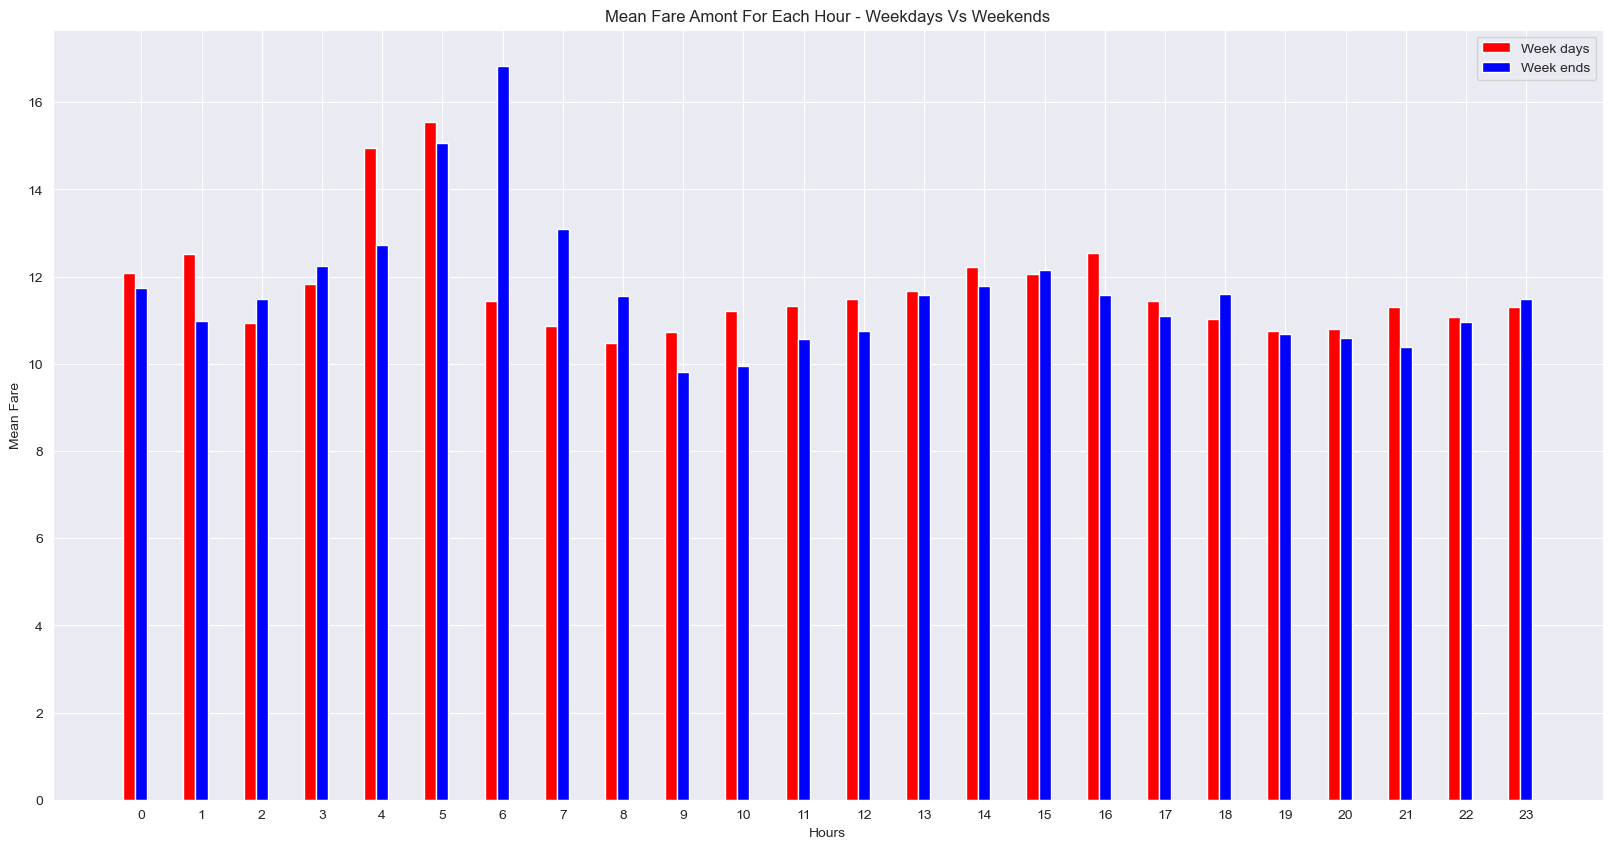

In [256]:
# hours
x = np.array(week_days_fare.Hour)
# an array of week day fare 
y = np.array(week_days_fare.amount)
# an array of week end fare
z = np.array(week_ends_fare.amount)
# Set the figure size, title, x and y labels
plt.figure(figsize = (20,10))
plt.title('Mean Fare Amont For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')
# Pass the three integers. The value of these integer should be less that 10
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', align='center', label = 'Week days')
ax.bar(x, z, width=0.2, color='blue', align='center', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()

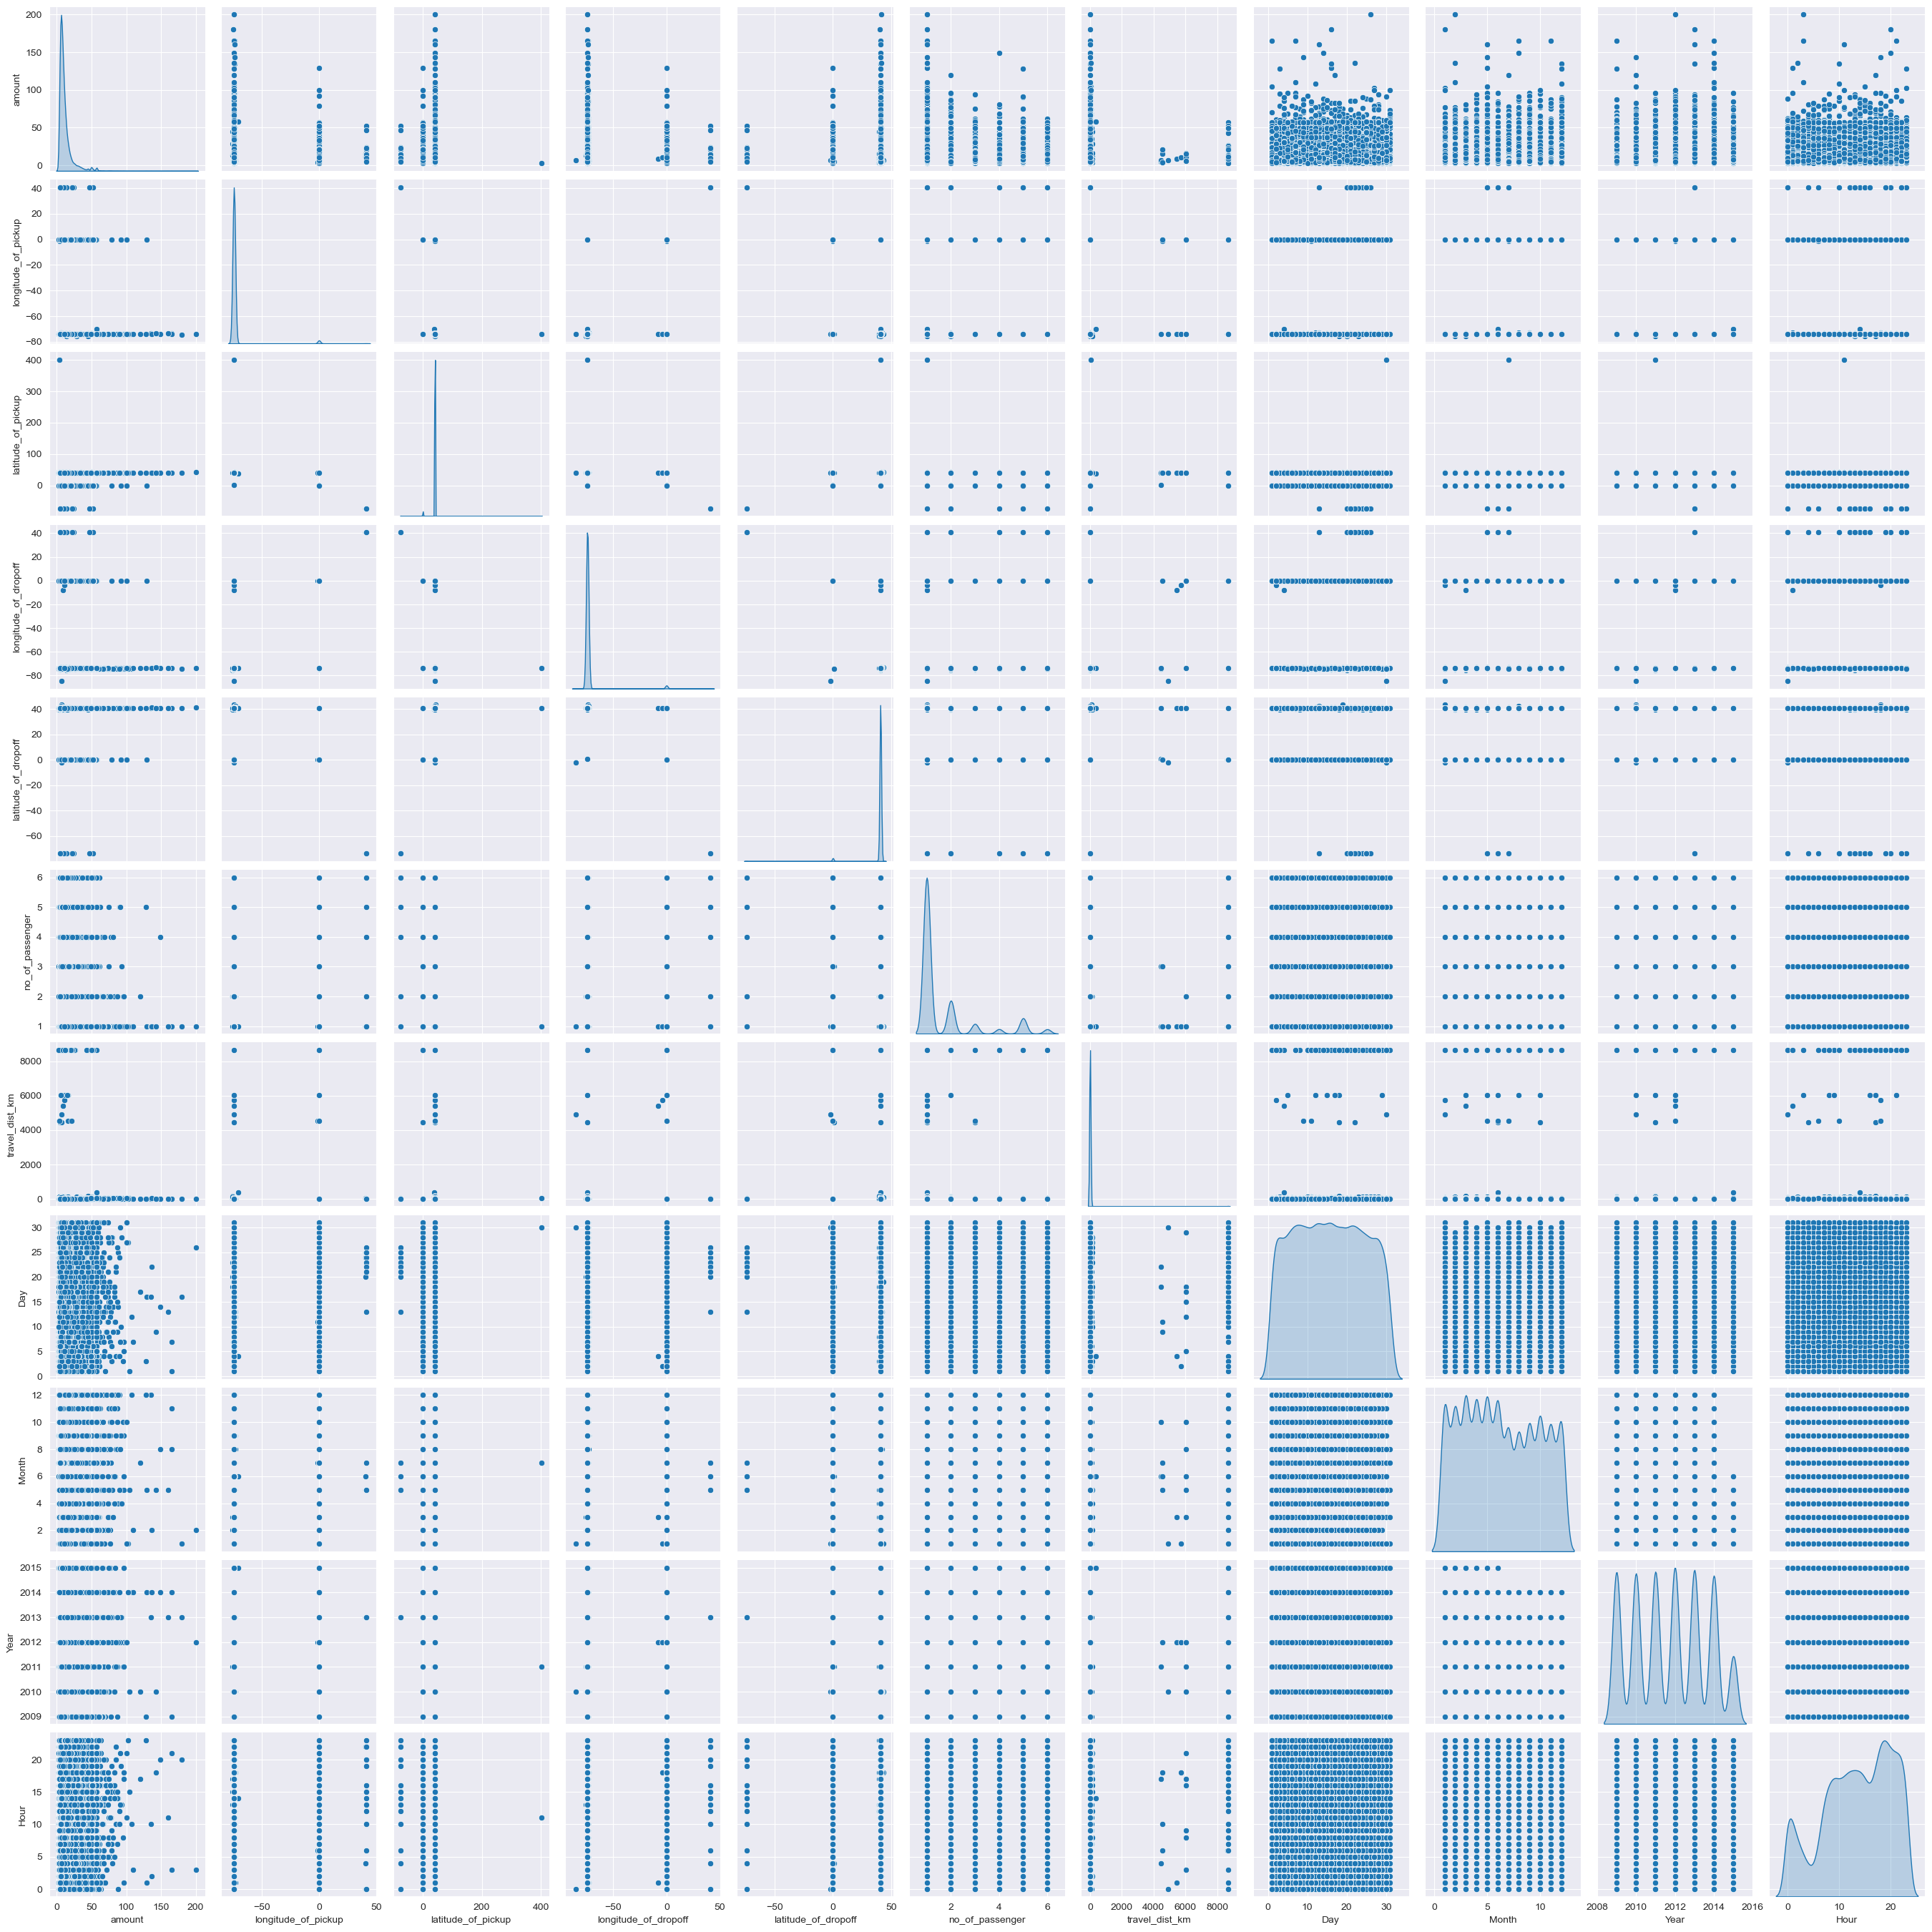

In [257]:
sns.pairplot(df,diag_kind="kde")

In [258]:
correlation=df.corr()

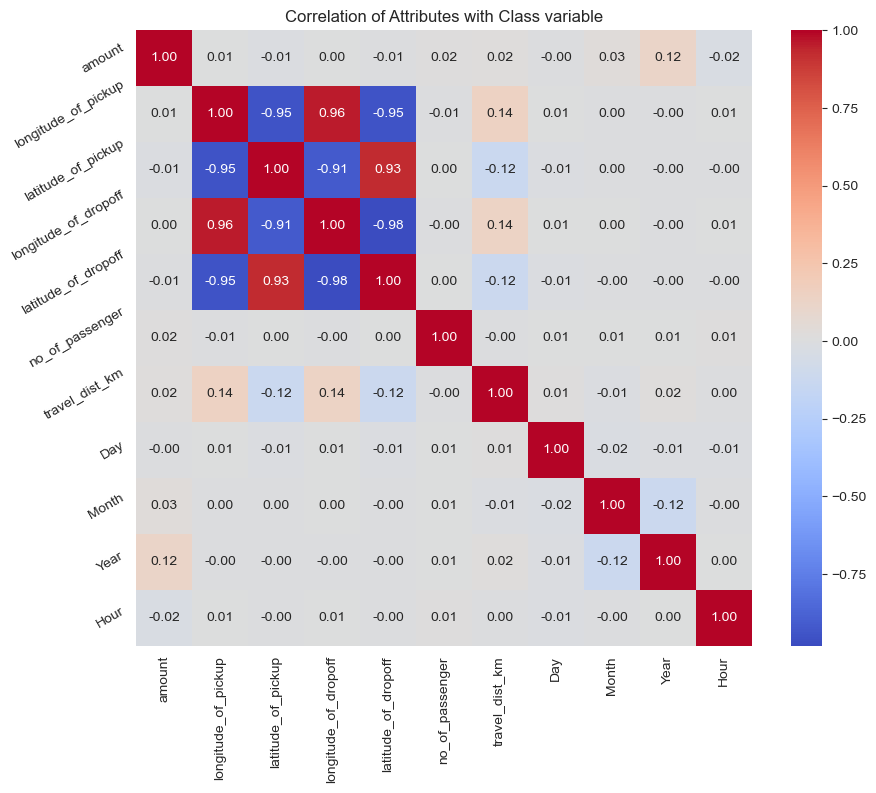

In [259]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white',cmap="coolwarm")
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)  
plt.show()

In [260]:
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
travel_dist_km                      float64
Day                                   int64
Day_of_week                          object
Month                                 int64
Month_Name                           object
Year                                  int64
Time                                 object
Hour                                  int64
DayOfWeek_1                          object
Month_wise                           object
Time_Category                        object
dtype: object

In [261]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,travel_dist_km,Day,Day_of_week,Month,Month_Name,Year,Time,Hour,DayOfWeek_1,Month_wise,Time_Category
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,15,Monday,6,June,2009,17:26:21,17,Weekday,Mid_Half,Evening
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,5,Tuesday,1,January,2010,16:52:16,16,Weekday,First_Half,Afternoon
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,18,Thursday,8,August,2011,00:35:00,0,Weekday,Mid_Half,Night
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,21,Saturday,4,April,2012,04:30:42,4,Weekend,Last_Half,Night
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,9,Tuesday,3,March,2010,07:51:00,7,Weekday,First_Half,Morning


In [262]:
df= df.drop(["date_time_of_pickup","longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff","Time","DayOfWeek_1"],axis=1)

In [263]:
df = pd.get_dummies(df,columns = ["Month_wise","Time_Category","Day_of_week","Month_Name"])

In [264]:
df.dtypes

amount                     float64
no_of_passenger              int64
travel_dist_km             float64
Day                          int64
Month                        int64
Year                         int64
Hour                         int64
Month_wise_31                uint8
Month_wise_First_Half        uint8
Month_wise_Last_Half         uint8
Month_wise_Mid_Half          uint8
Time_Category_Afternoon      uint8
Time_Category_Evening        uint8
Time_Category_Morning        uint8
Time_Category_Night          uint8
Day_of_week_Friday           uint8
Day_of_week_Monday           uint8
Day_of_week_Saturday         uint8
Day_of_week_Sunday           uint8
Day_of_week_Thursday         uint8
Day_of_week_Tuesday          uint8
Day_of_week_Wednesday        uint8
Month_Name_April             uint8
Month_Name_August            uint8
Month_Name_December          uint8
Month_Name_February          uint8
Month_Name_January           uint8
Month_Name_July              uint8
Month_Name_June     

In [265]:
from sklearn.ensemble import RandomForestRegressor

In [266]:
x=df.drop(["amount"],axis=1)
y=df["amount"]

In [267]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [268]:
model_1=RandomForestRegressor(n_estimators=210,criterion='friedman_mse', max_depth= 5)
model_1.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=5, n_estimators=210)

In [270]:
model_1.score(x_train,y_train)

0.7650459424420912

In [271]:
model_1.score(x_test,y_test)

0.7141716376854195